# STATS 507, Week 9 practice: scikit learn

### Problem 1 Your first machine learning project
This practice shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.

Load data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html

Split data: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html

Evaluate the model performance:https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

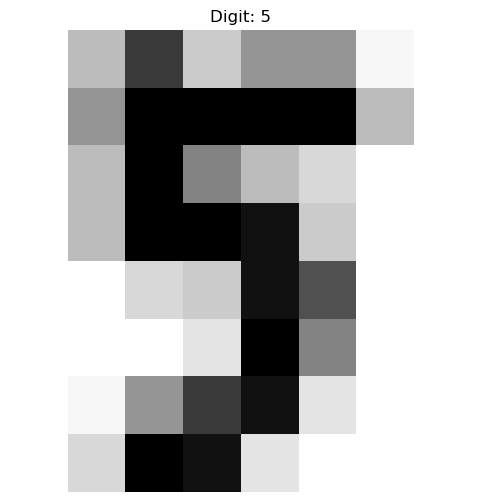

In [20]:
# Load the dataset
digits = datasets.load_digits()
print(digits.DESCR)
print(digits.data)

# Load the dataset with (data, target)
X, y = datasets.load_digits(return_X_y=True) # Their Code

# Visualize a sample digit
plt.figure(figsize=(6, 6))
plt.imshow(X[33].reshape(8, 8), cmap="Greys") # The input x
plt.title(f"Digit: {y[33]}")                  # The output label y
plt.axis('off')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets # their code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1437, 64) (360, 64)
(1437,) (360,)


In [10]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1) # C is yet another hyperparameter
clf.fit(X_train, y_train)

SVC(C=1)

In [12]:
# Evaluate the model
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# harmonic mean of Precision and Recall


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



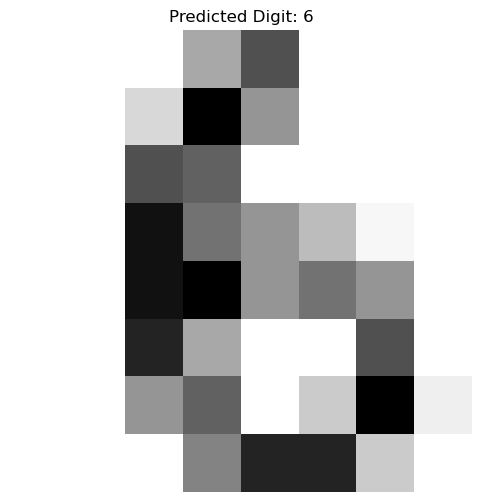

In [14]:
# Visualize the predicted digit
sample_digit = X_test[0]
prediction = clf.predict([sample_digit])
plt.figure(figsize=(6, 6))
plt.imshow(X_test[0].reshape(8, 8), cmap="Greys")
plt.title(f"Predicted Digit: {prediction[0]}")
plt.axis('off')
plt.show()